Testing code
============

## Modern programming practices and science

* Researchers and scientific software developers write software daily, but few have been trained to do so
* Good programming practices make a BIG difference
* We can learn a lot from the development methods developed for commercial and open source software in the past 10 years


In [4]:
from IPython.display import Image
Image("images/pulsar.png")

## Requirements for scientific programming

* Main requirement: scientific code must be error free
* Scientist time, not computer time is the bottleneck
 * Being able to explore many different models and statistical analyses is more important than a very fast single approach
* Reproducibility and re-usability:
 * Every scientific result should be independently reproduced at least internally before publication (DFG, 1999)
 * Increasing pressure for making the source code used in publications available online (especially for theoretical papers)
 * No need for somebody else to re-implement your algorithm 

## Effect of software errors in science

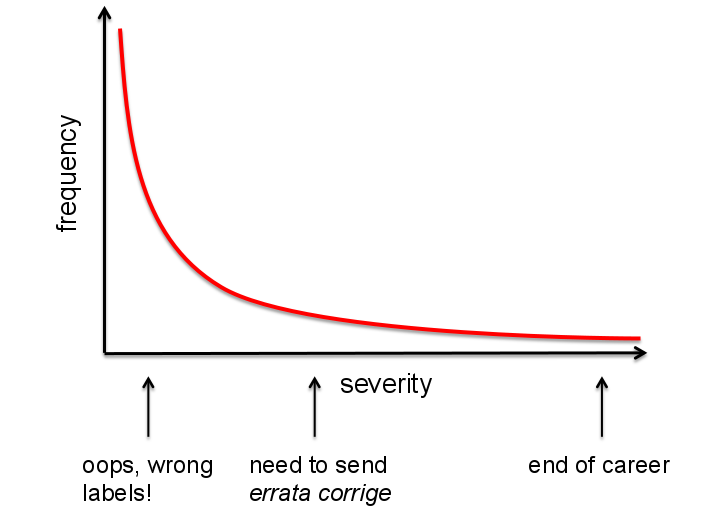

In [2]:
Image("images/errors_in_science.png", height=400, width=400)

## Software bugs in research are a serious business

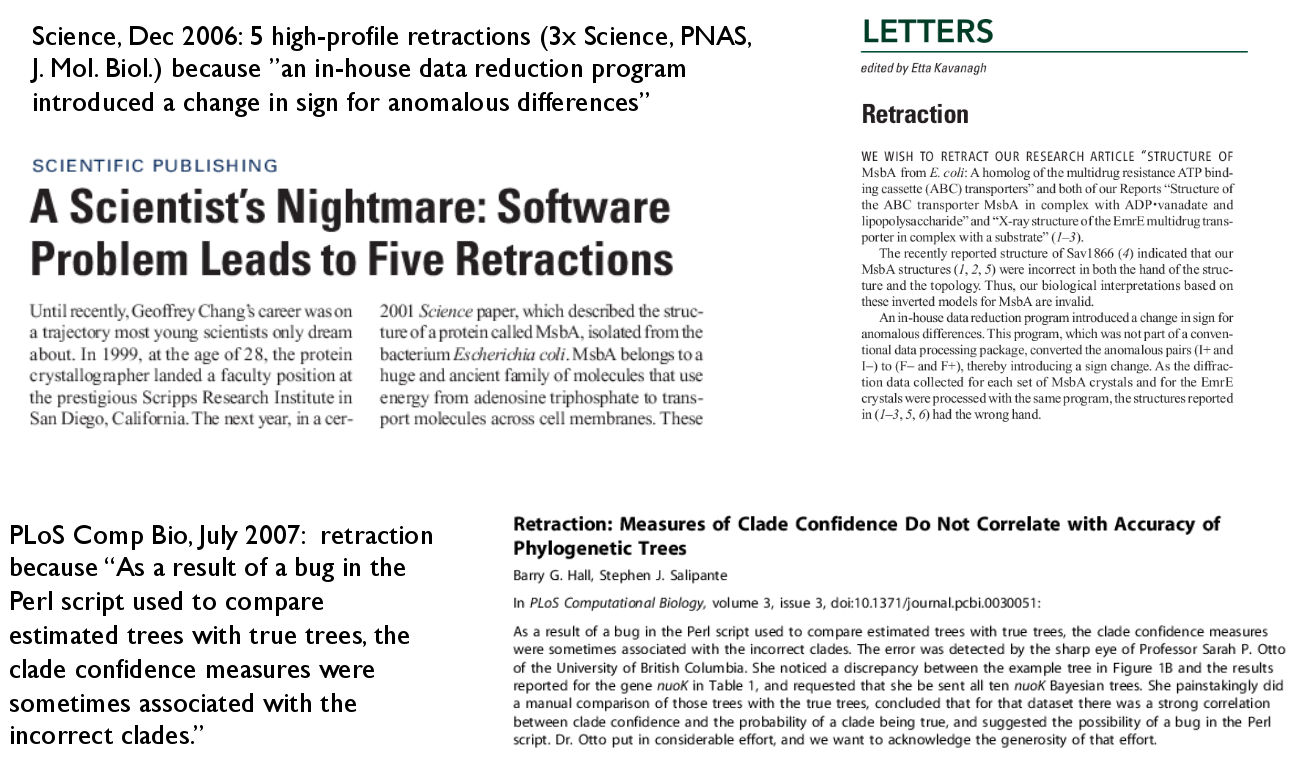

In [3]:
Image("images/software_bugs_in_research.png")

## The basic agile development cycle

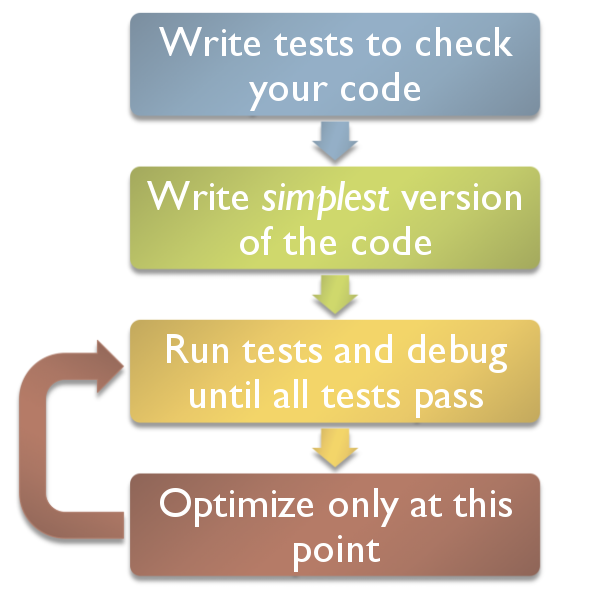

In [4]:
Image("images/agile_development_cycle.png", height=300, width=300)

## Reminder: Testing in agile development
* Formal software testing has become one of the most important parts of modern software development
* Tests become part of the programming cycle and are automated:
 * Write test suite in parallel with your code
 * External software runs the tests and provides reports and statistics

```
test_choice (__main__.TestSequenceFunctions) ... ok
test_sample (__main__.TestSequenceFunctions) ... ok
test_shuffle(__main__.TestSequenceFunctions) ... ok
-------------------------------------------------------
Ran 3 tests in 0.110s
OK
```

Visit https://github.com/Blosc/bcolz for an example af automated testing.

## Testing benefits
* Tests are the only way to trust your code
* Faster development:
 * Bugs are always pinpointed
 * Avoids starting all over again when fixing one part of the code causes a bug somewhere else
* Encourages better code and optimization: code can change, and consistency is assured by tests 

## Example: writing some unit tests

This is an example of unit testing. We are trying to make sure that the function calc_gc properly calculated the gc fraction of the DNA sequence.
Checks to be performed:

1. the sequence contained 'N's
2. the sequence contained lowercase char

In [7]:
#%%file calc_gc.py
def calc_gc(sequence):
    sequence = sequence.upper()                    # make all chars uppercase
    n = sequence.count('T') + sequence.count('A')  # count only A, T,
    m = sequence.count('G') + sequence.count('C')  # C, and G -- nothing else (no Ns, Rs, Ws, etc.)
    return float(m) / float(n + m) if n+m else 0

def test_1(): # test handling N
    result = round(calc_gc('NATGC'), 2)
    assert result == 0.5, result
    
def test_2(): # test handling lowercase
    result = round(calc_gc('natgc'), 2)
    assert result == 0.5, result

### Exercise

Make sure that the code has protection to avoid a division by zero for sequences with no A, T, C, G.

### Solution

In [9]:
def test_3():
    result = round( calc_gc('ykpqws'),2)
    assert result == 0, result
    
test_1(),test_2(),test_3()

(None, None, None)

## Example: checking numerical results

In this new example we are going to check that some numerical computations:

In [14]:
%%file test_numbers.py
import numpy as np
from numpy.testing import assert_almost_equal
import numexpr as ne

def test_numpy():
    x = np.linspace(0, 5, 100)
    result1 = x**3
    result2 = x*x*x
    assert_almost_equal(result1, result2)
    
def test_numexpr():
    x = np.linspace(0, 5, 100)
    result1 = x**3
    result2 = ne.evaluate("x**3")
    assert_almost_equal(result1, result2)


Overwriting test_numbers.py


In [15]:
!pytest test_numbers.py

============================= test session starts ==============================
platform darwin -- Python 3.5.2, pytest-3.0.3, py-1.4.31, pluggy-0.4.0
rootdir: /Users/Gonzalo/github/Training-Next-Collaboration/testing_code, inifile: 
collected 2 items 

test_numbers.py ..

=========================== 2 passed in 1.15 seconds ===========================


Hmm, something is not going on well, so:

### Exercise

What's wrong with the tests above?  Try to fix them.

*Hint:*  You should know that the comparison in floating point is a bit tricky due to small differences in precision.  Try to use another, more convenient,  test function than `assert_equal`.

### Solution

In [32]:
%%file test_primes.py
def is_prime(number):
    """Return True if *number* is prime."""
    if (number <= 0):
        raise ValueError("Negative numbers or 0 not allowed")
    if (round(number) != number):
        raise ValueError("This functions is for integers only")
    if number == 1: return False
    
    
    for element in range(2,number):
        if number % element == 0:
            return False
    return True

def test_is_five_prime():
    """Is five successfully determined to be prime?"""
    assert is_prime(5)
    
def test_is_ten_prime():
    """Is five successfully determined to be prime?"""
    assert not is_prime(10)

def test_is_one_prime():
    """Is five successfully determined to be prime?"""
    assert not is_prime(1)
    
def test_is_negative_prime():
    """Is five successfully determined to be prime?"""
    try:
        is_prime(-10)
    except ValueError:
        return True
        

Overwriting test_primes.py


In [33]:
!pytest test_primes.py

============================= test session starts ==============================
platform darwin -- Python 3.5.2, pytest-3.0.3, py-1.4.31, pluggy-0.4.0
rootdir: /Users/Gonzalo/github/Training-Next-Collaboration/testing_code, inifile: 
collected 4 items 

test_primes.py ....

=========================== 4 passed in 0.03 seconds ===========================


### Solution

## Further reading

* [pytest](http://doc.pytest.org/en/latest/) is a mature package for testing
* [coverage](https://coverage.readthedocs.io) for discovering parts of your code that are not covered
* [Tools to efficiently build scientific code](https://python.g-node.org/wiki/_media/2016_testing_debugging_profiling.pdf) Nice tutorial with emphasis en testing.